In [1]:
from analysis.analysis_facade import AnalysisFacade

facade = AnalysisFacade()
analysis_data = facade.combine_project_data()
random_project_name = 'ACRA.acra'
print(analysis_data[random_project_name])

{'avg_sstubs_per_bucket': 2.1052631578947367, 'avg_total_difftime': 4.947368421052632, 'avg_threshold_difftime': 0.0, 'buckets_amount': 19, 'sstubs_amount': 40, 'shares_of_buckets_with_all_sstubs_in_same_package': 1.0, 'buckets': {'5232075487096810843': {'packages_to_sstub_counts': {'acra-limiter/src/main/java/org/acra/config': 2}, 'max_package_sstubs_share': 1.0, 'max_file_sstubs_share': 1.0, 'affected_packages_count': 1, 'affected_files_count': 1, 'timestamps': [datetime.date(2018, 10, 3), datetime.date(2018, 10, 3)], 'overallDiffTime': 0, 'thresholdDiffTime': 0, 'numOfSstubs': 2}, '4561876254608465649': {'packages_to_sstub_counts': {'acra-core/src/main/java/org/acra/builder': 2}, 'max_package_sstubs_share': 1.0, 'max_file_sstubs_share': 1.0, 'affected_packages_count': 1, 'affected_files_count': 1, 'timestamps': [datetime.date(2018, 4, 11), datetime.date(2018, 3, 24)], 'overallDiffTime': 18, 'thresholdDiffTime': 0, 'numOfSstubs': 2}, '5073720577013220897': {'packages_to_sstub_counts'

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
def get_bucket_to_path_graph(ax, path_type):
    for project_info in list(analysis_data.values()):
        x_array = []
        y_array = []
        buckets_amount = len(project_info['buckets'].values())
        all_affected_paths_counts = [bucket[f'affected_{path_type}_count'] 
                                     for bucket in project_info['buckets'].values()]
        distinct_counts = sorted(set(all_affected_paths_counts))
        for x_value in distinct_counts:
            x_array.append(x_value)
            x_value_appearances = len([1 for count in all_affected_paths_counts 
                                       if x_value == count])
            y_array.append(x_value_appearances/buckets_amount)
    #     print(buckets_amount, x_array, y_array, all_affected_paths_counts) 
        ax.plot(x_array, y_array)
    #     ax.scatter(x_array, y_array, s=3)


    ax.set_xlabel(f'Number of {path_type} affected by bucket', fontsize=12)
    ax.set_ylabel('percentage of buckets per project', fontsize=12)

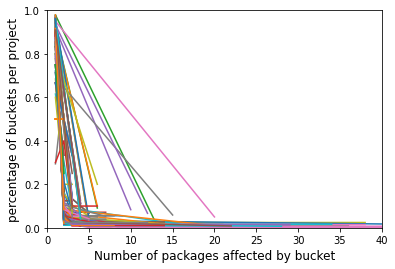

In [10]:
#buckets to affected packages
fig = plt.figure()
ax = plt.gca()
ax.axis([0,40,0,1])

get_bucket_to_path_graph(ax, 'packages')

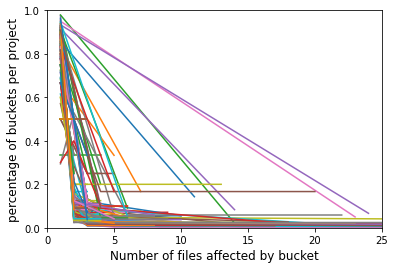

In [9]:
#buckets to affected files
fig = plt.figure()
ax = plt.gca()
ax.axis([0,25,0,1])

get_bucket_to_path_graph(ax, 'files')

Text(0, 0.5, 'percentage of buckets per project')

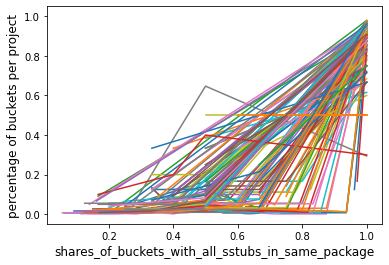

In [15]:
#percentage of buckets with all sstubs in 1 package
fig = plt.figure()
ax = plt.gca()

for project_info in list(analysis_data.values()):
    x_array = []
    y_array = []
    buckets_amount = len(project_info['buckets'].values())
    all_buckets_path_percentages = [bucket['max_package_sstubs_share'] 
                                    for bucket in project_info['buckets'].values()]
    unique_percentages = sorted(set(all_buckets_path_percentages))
    for x_value in unique_percentages:
        x_array.append(x_value)
        x_value_appearances = len([1 for percentage in all_buckets_path_percentages 
                                   if x_value == percentage])
        y_array.append(x_value_appearances/buckets_amount)
#     print(x_array, y_array, all_buckets_path_percentages) 
    ax.plot(x_array, y_array)

ax.set_xlabel('shares_of_buckets_with_all_sstubs_in_same_package', fontsize=12)
ax.set_ylabel('percentage of buckets per project', fontsize=12)

Text(0, 0.5, 'percentage of buckets per project')

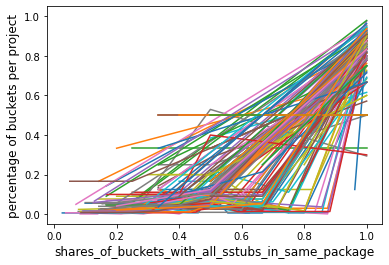

In [18]:
#percentage of buckets with all sstubs in 1 file
fig = plt.figure()
ax = plt.gca()

for project_info in list(analysis_data.values()):
    x_array = []
    y_array = []
    buckets_amount = len(project_info['buckets'].values())
    all_buckets_path_percentages = [bucket['max_file_sstubs_share'] 
                                    for bucket in project_info['buckets'].values()]
    unique_percentages = sorted(set(all_buckets_path_percentages))
    for x_value in unique_percentages:
        x_array.append(x_value)
        x_value_appearances = len([1 for percentage in all_buckets_path_percentages 
                                   if x_value == percentage])
        y_array.append(x_value_appearances/buckets_amount)
#     print(x_array, y_array, all_buckets_path_percentages) 
    ax.plot(x_array, y_array)

ax.set_xlabel('shares_of_buckets_with_all_sstubs_in_same_package', fontsize=12)
ax.set_ylabel('percentage of buckets per project', fontsize=12)

In [ ]:
# average thresholdifftime/overallDifftime across projects 

Text(0, 0.5, 'avg_total_difftime')

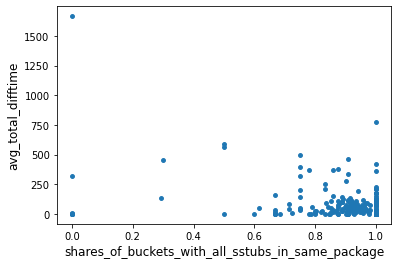

In [11]:
# average avg_total_difftime over shares_of_buckets_with_all_sstubs_in_same_package per project

fig = plt.figure()
ax = plt.gca()

x_array = []
y_array = []

for project_info in analysis_data.values():
    x_array.append(project_info['shares_of_buckets_with_all_sstubs_in_same_package'])
    y_array.append(project_info['avg_total_difftime'])

ax.scatter(x_array, y_array, s=15)
ax.set_xlabel('shares_of_buckets_with_all_sstubs_in_same_package', fontsize=12)
ax.set_ylabel('avg_total_difftime', fontsize=12)

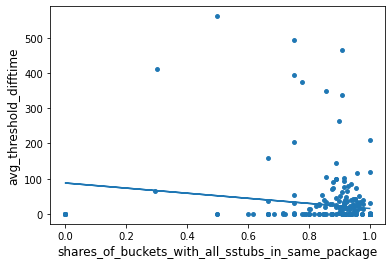

In [29]:
# average thresholdDifftime over shares_of_buckets_with_all_sstubs_in_same_package

fig = plt.figure()
ax = plt.gca()

x_array = []
y_array = []

for project_info in analysis_data.values():
    x_array.append(project_info['shares_of_buckets_with_all_sstubs_in_same_package'])
    y_array.append(project_info['avg_threshold_difftime'])

ax.scatter(x_array, y_array, s=15)
ax.set_xlabel('shares_of_buckets_with_all_sstubs_in_same_package', fontsize=12)
ax.set_ylabel('avg_threshold_difftime', fontsize=12)

#fitting line
x = np. array(x_array)
y = np. array(y_array)
m, b = np. polyfit(x, y, 1)
plt.plot(x, m*x + b)

<p>the difftime over shares_of_buckets_with_all_sstubs_in_same_package graphs show: </p>
<p>- using the thresholDiffTime rather than total_difftime reduces the difftime values significantly, indicating that many of the very large values >100 days are individual cases rather than systematic occurences within a project. This assumption could be reasoned better if we look at the amount of sstubs or buckets for those projects which still have avg_threshold_difftime >100, and identify if it could be the case that there was a very small total amount of sstubs or buckets within these projects.</p>
<p>- Each dot represents 1 project. There are a few projects that appear to perform significantly worse on one or even on both dimensions. Maybe we can look at them individually and see if they have something particular in common? </p>
<p>- there is no obvious correlation indicating that when sstubs are more often spread across multiple packages, also the time of fixing them takes longer. But maybe this is just not clear now because it is hard to see the distribution of difftimes across any specific package_share value. 2 ideas to identify this: 1) We split the shares_of_buckets_with_all_sstubs_in_same_package into intervals, e.g. in 0.05 intervals, and calculate the overall avg difftime across all projects in each interval. Then, maybe we would see a correlation. I did this below, but it actually doesn't really help. 2) we don't aggregate by project, maybe that will make the case more clear</p>

In [25]:
import math
import numpy as np


def get_middle_of_belonging_interval(x, interval_size=0.05):
    if x == 0:
        return interval_size/2
    lower_end_of_interval_of_x = math.ceil(x / interval_size) * interval_size
    middle_of_interval = lower_end_of_interval_of_x - interval_size/2
    return middle_of_interval

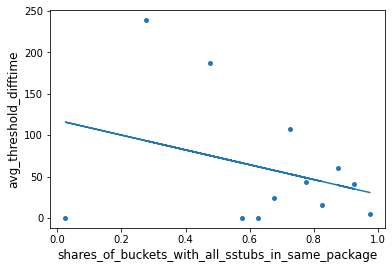

In [28]:
#average threshold difftime across projects per interval of shares_of_buckets_with_all_sstubs_in_same_package

share_interval_to_difftimes = {}
for project_info in analysis_data.values():
    share = project_info['shares_of_buckets_with_all_sstubs_in_same_package']
    interval_key = get_middle_of_belonging_interval(share)
    difftime = project_info['avg_threshold_difftime']
    if interval_key in share_interval_to_difftimes.keys():
        share_interval_to_difftimes[interval_key].append(difftime)
    else:
        share_interval_to_difftimes[interval_key] = [difftime]

x_array = []
y_array = []
# share_interval_to_avg_difftime = {}
for interval_middle, difftimes in share_interval_to_difftimes.items():
    avg_difftime = sum(difftimes)/len(difftimes)
#     share_interval_to_avg_difftime[interval_middle] = avg_difftime
    x_array.append(interval_middle)
    y_array.append(avg_difftime)


fig = plt.figure()
ax = plt.gca()
ax.scatter(x_array, y_array, s=15)
ax.set_xlabel('shares_of_buckets_with_all_sstubs_in_same_package', fontsize=12)
ax.set_ylabel('avg_threshold_difftime', fontsize=12)

#fitting line
x = np. array(x_array)
y = np. array(y_array)
m, b = np. polyfit(x, y, 1)
plt.plot(x, m*x + b)

<p>Actually intervals are not really a good idea, as different intervals should have different weights for the regression if they have more or less projects inside than others. So probably we won't use this</p>

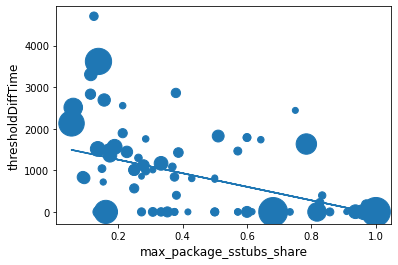

In [52]:
#average threshold difftime across buckets over shares_of_buckets_with_all_sstubs_in_same_package (not aggregated by prject)

fig = plt.figure()
ax = plt.gca()

x_array = []
y_array = []
size_array = []

all_buckets = {}
for project_name, project_info in analysis_data.items():
    buckets = project_info['buckets']
    for bucket_id, bucket_details in buckets.items():
        #if buckets with identical hashes exist in different projects, they should be counted individually
        bucket_id_with_project = str(bucket_id) + project_name 
        all_buckets[bucket_id_with_project] = bucket_details


for bucket_details in all_buckets.values():
    if bucket_details['numOfSstubs'] > 10:
        x_array.append(bucket_details['max_package_sstubs_share'])
        y_array.append(bucket_details['thresholdDiffTime'])
        size_array.append(bucket_details['numOfSstubs'] *3)

ax.scatter(x=x_array, y=y_array, s=size_array)
# plt.scatter([1,2,3,4,5], [1,2,3,4,5], s=[1,2,3,4,5])
ax.set_xlabel('max_package_sstubs_share', fontsize=12)
ax.set_ylabel('thresholdDiffTime', fontsize=12)

#fitting line
x = np.array(x_array)
y = np.array(y_array)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
